IMPORTING LIBRARIES

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

LOADING THE DATASET

In [2]:
df=pd.read_csv('titanic.csv')
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

top 5 heads of the dataset.

EDA

In [3]:
#checking missing data
df.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

we can see true is showing the Nan value or missing value and false is showing no Nan or missing value.
we can check the missing values in another way because not getting the overall information.

In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

now we can see in Age column we have 177 missing values , in cabin column we have 687 miising values that is too much and in emabrked column we have 2 missing values.

<AxesSubplot:>

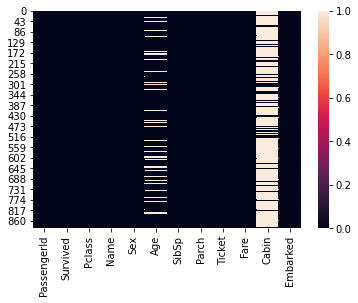

In [5]:
# checking missing value through heatmap
sns.heatmap(df.isnull())

we can see missing values in age and cabin cloumn, we cant see missing values in embarked column because missing values is very low.

<AxesSubplot:xlabel='Survived', ylabel='count'>

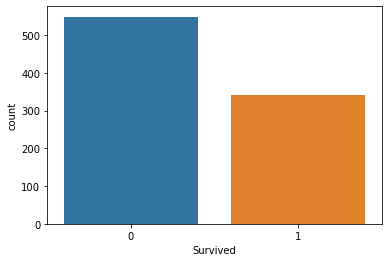

In [8]:
#checking count of survived column

sns.countplot(df['Survived'])

0 is indiacting no survived and 1 is indicating who survived,
so oon the basis of this plot most of the people was unable to survived.

<AxesSubplot:xlabel='Survived', ylabel='count'>

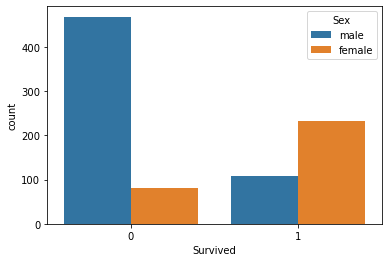

In [12]:
# basis on the male and female
sns.countplot('Survived',hue='Sex',data=df)

we can see blue color is for male and yellow color is for female, and in 0 the number of male was apporx 500 and the number of female was approx 80 ,they were unable to survive.

and in 1 ,approx 100 male and 250 females were able to survive.

<AxesSubplot:xlabel='Survived', ylabel='count'>

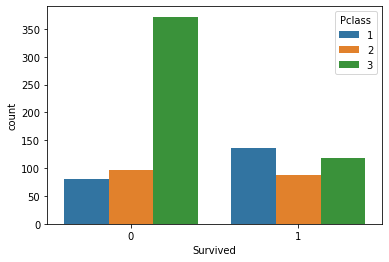

In [13]:
# basis of Pclass
sns.countplot('Survived',hue='Pclass',data=df)

We can see there are 3 passenger classes, 1,2 and 3 ,blue color is indicating 1 , yellow color is indicating 2 and green color is indicating 3.

so on the basis of above plot in 1st class approx 75 , in 2nd class approx 100 and in 3rd class approx 400 persons were unable to survive.

and in 1st class approx 140 ,in 2nd class approx 90 and in 3rd class approx 125 persons were able to survive.

<AxesSubplot:xlabel='Age'>

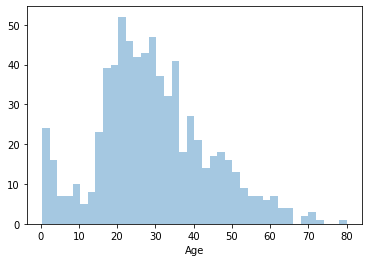

In [16]:
# distribution of age 
sns.distplot(df['Age'].dropna(),bins=40, kde=False)

we can see  most of the persons were in age group of approx 15 to 35 and the very less person were in age group of 65 to 80.

<AxesSubplot:xlabel='SibSp', ylabel='count'>

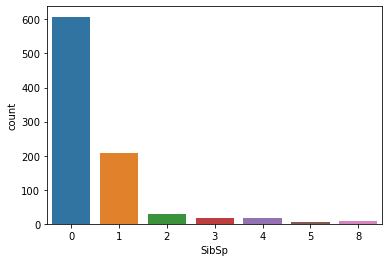

In [17]:
# countplot of SibSp

sns.countplot(df['SibSp'])

Basically SibSp column is showing sibllings or spouse, so on the basis of above plot we can see in blue color maximum people did not have sibbling, in yellow color 200 peoples with 1 sibllings, in green color approx 50 peoples with 2 sibllings or spouse.

<AxesSubplot:>

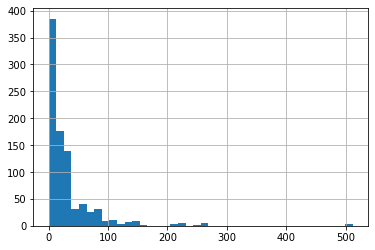

In [21]:
# histogram of Fare column

df['Fare'].hist(bins=40)

we can see the average fare of the people who bought the ticket.

DATA CLEANING

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

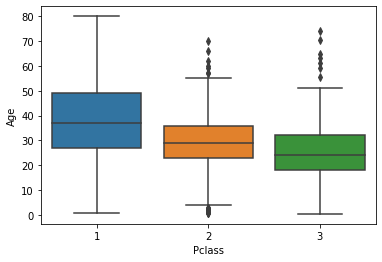

In [22]:
# age column

sns.boxplot(x='Pclass',y='Age',data=df)

In 1st class the average age is approx 35 , in 2nd class the average is approx 30 ,and in 3rd class the average age is 25.

In [25]:
#replacing the missing values on the basis of passenger class

def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 35
        
        elif Pclass==2:
            return 30
        
        else:
            return 35
        
    else:
        return Age

In [26]:
# Now applying function

df['Age']= df[['Age','Pclass']].apply(impute_age,axis=1)

In [27]:
#checking null values again
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

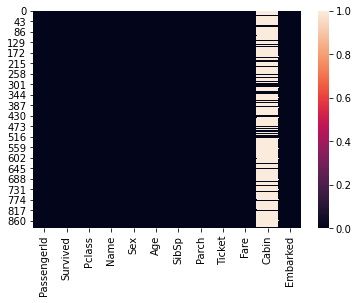

In [28]:
sns.heatmap(df.isnull())

Now we can see there is no missing value in Age column.

#  cabin column
in cabin column , there is so much of missing vaulues,so dropping of cabin column is necessary.

In [32]:
df.drop('Cabin',axis=1,inplace=True)

In [33]:
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

In [34]:
df.shape

(891, 11)

Now we can see the cabin column has been dropped from dataset.

<AxesSubplot:>

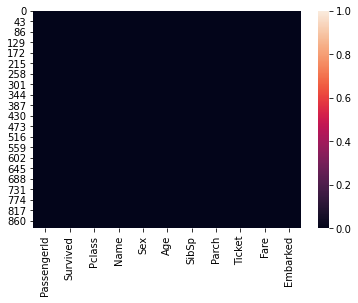

In [35]:
#checking missing values again
sns.heatmap(df.isnull())

Now we can see there is no missing values.

FEATURE ENGINEERING

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


We can see in the dataset 5 columns is of integer datatype, 4 columns is of object datatype and 2 column is of float datatype.

In [38]:
# converting categorical columns into numeric columns
pd.get_dummies(df['Embarked'],drop_first=True)


Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[891 rows x 2 columns]

after dropping first column we have 2 columns and 2 unique variable 0 and 1.

In [39]:
sex=pd.get_dummies(df['Sex'],drop_first=True)
embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [40]:
# now dropping the unnecessary column

df.drop(['Sex','Name','Embarked','Ticket'],axis=1,inplace=True)

In [41]:
df.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0            1         0       3  22.0      1      0   7.2500
1            2         1       1  38.0      1      0  71.2833
2            3         1       3  26.0      0      0   7.9250
3            4         1       1  35.0      1      0  53.1000
4            5         0       3  35.0      0      0   8.0500

In [42]:
df.shape

(891, 7)

Now we have 891 rows and 7 columns in the dataset.

SPLITTING THE DATSET INTO DEPENDENT AND INDEOENDENT FEATURE

In [45]:
x=df.drop('Survived',axis=1)
y=df['Survived']

TRAIN TEST SPLIT

In [46]:
from sklearn.model_selection import train_test_split

In [89]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.30, random_state=48)

MODEL BUILDING



LIBRARIES FOR MODEL BUILDING

In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn.model_selection import GridSearchCV


In [78]:

#DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.6529850746268657
[[120  54]
 [ 39  55]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       174
           1       0.50      0.59      0.54        94

    accuracy                           0.65       268
   macro avg       0.63      0.64      0.63       268
weighted avg       0.67      0.65      0.66       268



decision tree classifier is giving 65% accuracy score.

In [79]:
# For Logistic Regression

lr=LogisticRegression()

lr.fit(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))
    
    

0.6902985074626866
[[145  29]
 [ 54  40]]
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       174
           1       0.58      0.43      0.49        94

    accuracy                           0.69       268
   macro avg       0.65      0.63      0.63       268
weighted avg       0.68      0.69      0.68       268



Logistic Regression is giving 69% accuracy score.

In [80]:
# For AdaBoost Classifier


ad=AdaBoostClassifier()

ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))



0.6753731343283582
[[128  46]
 [ 41  53]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       174
           1       0.54      0.56      0.55        94

    accuracy                           0.68       268
   macro avg       0.65      0.65      0.65       268
weighted avg       0.68      0.68      0.68       268



AdaBoost classifier is giving 67% accuracy score.

In [81]:
# for Random Forest Classifier

rf=RandomForestClassifier()

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))


0.7388059701492538
[[138  36]
 [ 34  60]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       174
           1       0.62      0.64      0.63        94

    accuracy                           0.74       268
   macro avg       0.71      0.72      0.71       268
weighted avg       0.74      0.74      0.74       268



Random Forest classifier is giving 73% accuracy score.

In [82]:
# for Gaussian NB

gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7425373134328358
[[154  20]
 [ 49  45]]
              precision    recall  f1-score   support

           0       0.76      0.89      0.82       174
           1       0.69      0.48      0.57        94

    accuracy                           0.74       268
   macro avg       0.73      0.68      0.69       268
weighted avg       0.74      0.74      0.73       268



GaussianNB is giving 74% accuracy score.

we are getting highest accuracy with GaussianNB that is 85%  we will have to cross validate it.

CROSS VALIDATION

In [95]:
# For DecisionTreeClassifier
scr=cross_val_score(dt,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.6442470654698387


cross validation score of decision tree classifier is 65%

In [94]:
# For Logistc regression
scr=cross_val_score(lr,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.6880547360492122


cross validation score of logistic regression is 68%.

In [93]:
#For AdaBoostClassifier
scr=cross_val_score(ad,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.6588600841127361


cross validation score of adaboost classifier is 65%.

In [91]:
# For randomforest Classifier
scr=cross_val_score(rf,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.7037411336388174


cross validation score of Random Forest classifier is 70%.

In [90]:
# For GaussianNB
scr=cross_val_score(gnb,x,y,cv=5)
print('cross validation score',scr.mean())

cross validation score 0.6802083987194778


cross validation score of GaussianNB is 68%.

after cross validation Random Forest classifier is giving 70% cv score , so random forest classifier is best algoritham for the model.

HYPER PARAMETER TUNING

In [97]:


rf=RandomForestClassifier()

grid_param={'max_depth': np.arange(2,10),
           'criterion':['gini','entropy']}

gd_sr=GridSearchCV(estimator=rf,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)

gd_sr.fit(x,y)

best_parameters =gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)


{'criterion': 'gini', 'max_depth': 6}
0.7307450881928317


FINAL MODEL

In [98]:
final_mod=RandomForestClassifier(criterion='gini', max_depth=6)
final_mod.fit(x_train,y_train)
pred=final_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

72.01492537313433


after checking accuracy score , cross validation score and hyper parameter tuning , we are getting 72% predictive final accuracy score from RandomForest Classifier Algorithm.

 tried removing outliers but loosing the datset.

SAVING MODEL

In [99]:
import joblib
joblib.dump(final_mod,'FINAL_titanic.PKL')

['FINAL_titanic.PKL']